In [5]:
# task and homework
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#load dataset
df = pd.read_csv("/home/salwa/Downloads/Titanic-Dataset.csv")
print("5 Baris Pertama Dataset")
print(df.head())

5 Baris Pertama Dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [6]:
# identifikasi missing value

print("Missing Values per Kolom:")
print(df.isnull().sum())

Missing Values per Kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# imputasi missing value

# Kolom Age & Fare: median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Kolom Embarked: isi mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Kolom Cabin: terlalu banyak missing → drop
df = df.drop(columns=['Cabin'])

print("Missing value setelah imputasi")
print(df.isnull().sum())

Missing value setelah imputasi
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
# handle outliers

def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)

handle_outliers("Age")
handle_outliers("Fare")

In [9]:
# normalisasi numerik

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("Data Numerik Setelah Normalisasi")
print(df[['Age', 'Fare']].head())

Data Numerik Setelah Normalisasi
        Age      Fare
0  0.375000  0.110460
1  0.682692  1.000000
2  0.451923  0.120745
3  0.625000  0.809027
4  0.625000  0.122649


In [10]:
# standardisasi kategorikal

df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.upper()
df['Pclass'] = df['Pclass'].astype(str)

# One-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [11]:
# remove duplikat

before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"\nBaris sebelum remove duplicates: {before}")
print(f"Baris setelah remove duplicates: {after}")


Baris sebelum remove duplicates: 891
Baris setelah remove duplicates: 891


In [12]:
print("NFO DATASET FINAL")
print(df.info())

print("\n5 Baris Pertama Data akhir")
print(df.head())

NFO DATASET FINAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Pclass_2     891 non-null    bool   
 12  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 60.2+ KB
None

5 Baris Pertama Data akhir
   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr.

In [1]:
# WEEK 13

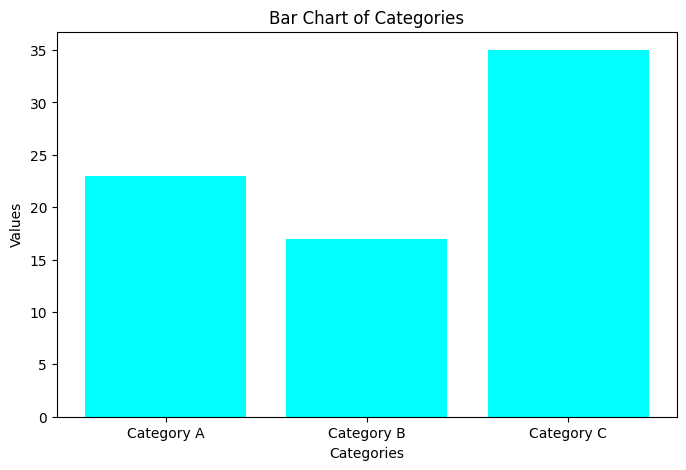

In [2]:
# Exercise 1: Basic Plotting with Matplotlib

import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()

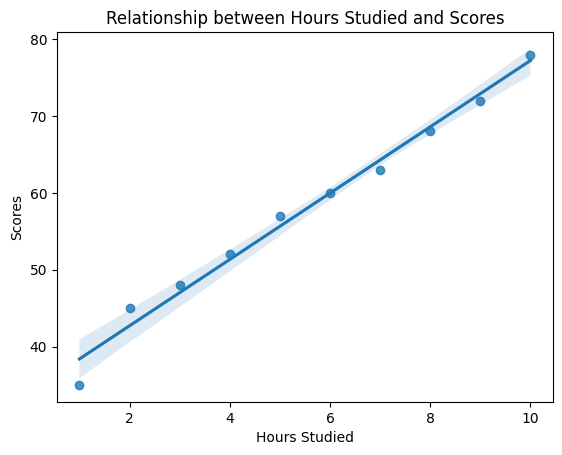

In [4]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

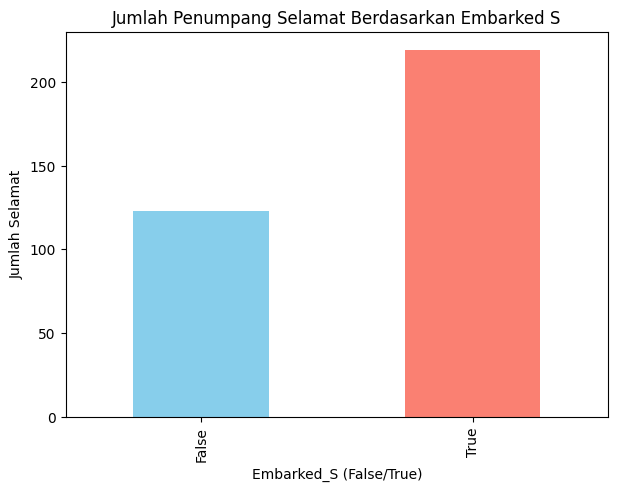

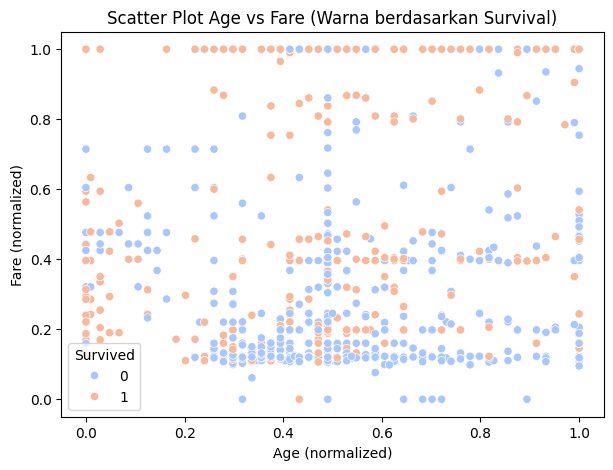

In [13]:
# practice task week 13

import matplotlib.pyplot as plt
import seaborn as sns

# Multi-bar chart: jumlah selamat berdasarkan Embarked
survive_by_embark = df.groupby('Embarked_S')['Survived'].sum()

plt.figure(figsize=(7,5))
survive_by_embark.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Jumlah Penumpang Selamat Berdasarkan Embarked S")
plt.xlabel("Embarked_S (False/True)")
plt.ylabel("Jumlah Selamat")
plt.show()

# Scatter plot hubungan Age dan Fare
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'], palette='coolwarm')
plt.title("Scatter Plot Age vs Fare (Warna berdasarkan Survival)")
plt.xlabel("Age (normalized)")
plt.ylabel("Fare (normalized)")
plt.show()

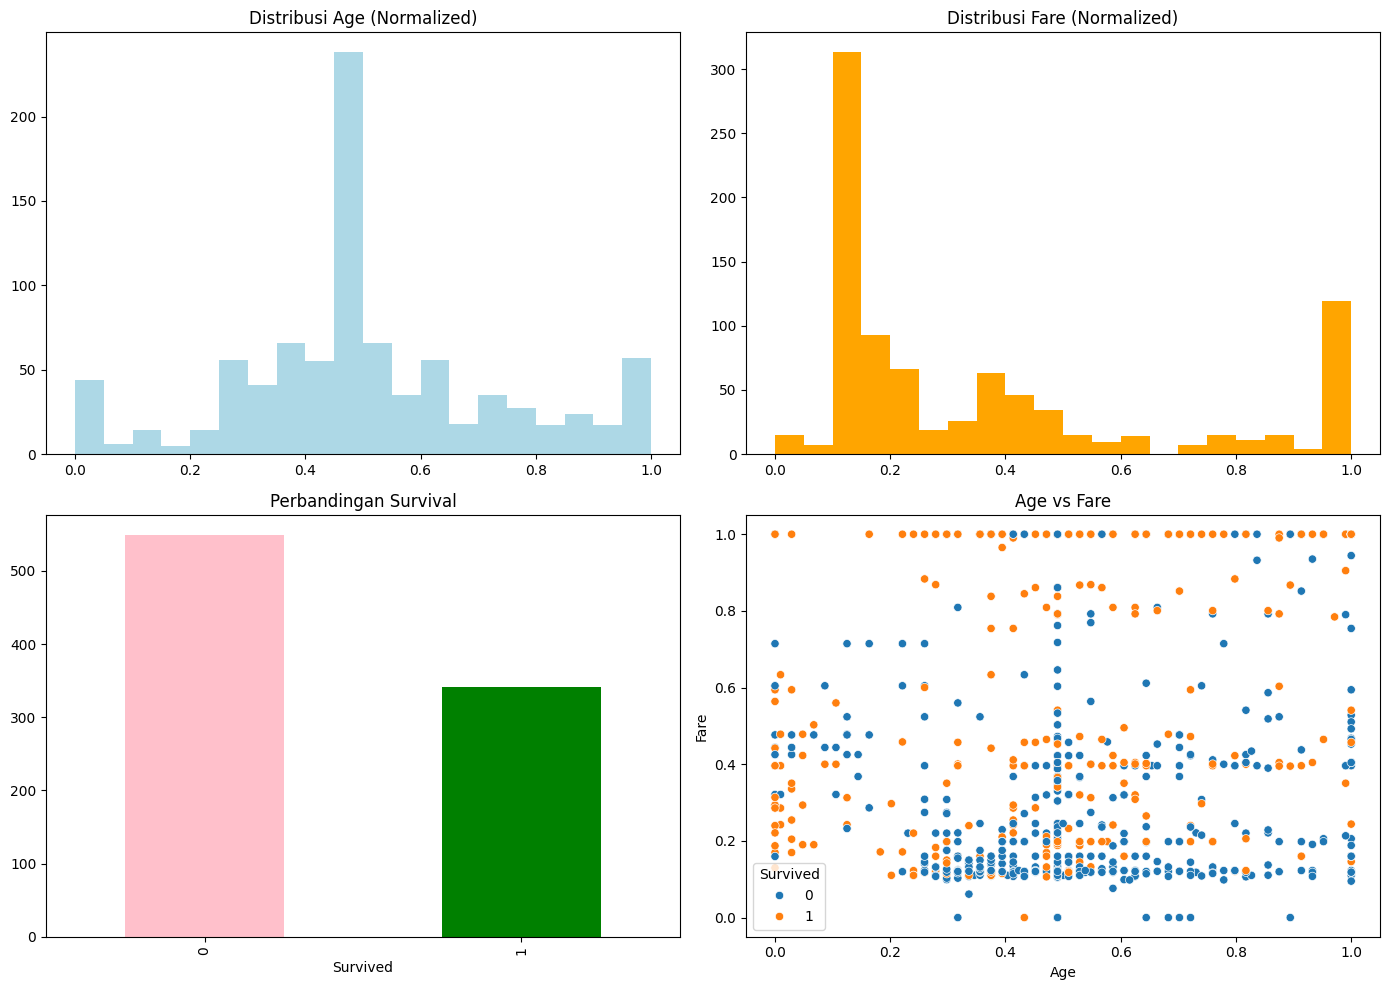

In [14]:
# homework week 13

import matplotlib.pyplot as plt
import seaborn as sns

# Tambah fitur AgeGroup
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0,0.20,0.40,0.60,1.0],
                        labels=['Young','Adult','Middle','Older'])

# Tambah fitur IsAlone
df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)

# Dashboard
plt.figure(figsize=(14,10))

# Plot 1
plt.subplot(2,2,1)
plt.hist(df['Age'], bins=20, color='lightblue')
plt.title("Distribusi Age (Normalized)")

# Plot 2
plt.subplot(2,2,2)
plt.hist(df['Fare'], bins=20, color='orange')
plt.title("Distribusi Fare (Normalized)")

# Plot 3
plt.subplot(2,2,3)
df['Survived'].value_counts().plot(kind='bar', color=['pink','green'])
plt.title("Perbandingan Survival")

# Plot 4
plt.subplot(2,2,4)
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])
plt.title("Age vs Fare")

plt.tight_layout()
plt.show()